# Reading Recorded Inputs

A class / module will eventually be released to handle the parsing / reading of the generated `input_recording.h5` when using `serpent record`. In the meantime, this notebook will demonstrate some common operations you might want to perform.

To use this notebook, you will need a HDF5 that contains recorded game inputs.

In [1]:
import h5py

import io
import skimage.io

%matplotlib inline

In [2]:
file_path = "datasets/input_recording.h5"

## HDF5 File Structure

The prefix of the datasets for every seen game frame buffer during the recording corresponds to the timestamp of the second to last frame of that buffer.

Every game frame buffer will have 4 datasets:

* **[timestamp]-frames**: An array of PNG bytes for every game frame in the buffer
* **[timestamp]-inputs**: An array of key-duration tuples that happened during that exact game frame buffer
* **[timestamp]-inputs-active**: An array of keys that are still held down from a previous game frame buffer
* **[timestamp]-reward**: A reward score, if a reward function was configured before recording

You can inspect the datasets of your HDF5 file like this:

In [3]:
with h5py.File(file_path, "r") as f:
    for key in f.keys():
        print(key)

1516957238.309477-frames
1516957238.309477-inputs
1516957238.309477-inputs-active
1516957238.309477-reward
1516957238.4155788-frames
1516957238.4155788-inputs
1516957238.4155788-inputs-active
1516957238.4155788-reward
1516957238.4836445-frames
1516957238.4836445-inputs
1516957238.4836445-inputs-active
1516957238.4836445-reward
1516957238.5962522-frames
1516957238.5962522-inputs
1516957238.5962522-inputs-active
1516957238.5962522-reward
1516957238.7083597-frames
1516957238.7083597-inputs
1516957238.7083597-inputs-active
1516957238.7083597-reward
1516957238.831978-frames
1516957238.831978-inputs
1516957238.831978-inputs-active
1516957238.831978-reward
1516957238.8990426-frames
1516957238.8990426-inputs
1516957238.8990426-inputs-active
1516957238.8990426-reward
1516957239.010149-frames
1516957239.010149-inputs
1516957239.010149-inputs-active
1516957239.010149-reward
1516957239.1172519-frames
1516957239.1172519-inputs
1516957239.1172519-inputs-active
1516957239.1172519-reward
1516957239.21

1516957308.351689-reward
1516957308.4668002-frames
1516957308.4668002-inputs
1516957308.4668002-inputs-active
1516957308.4668002-reward
1516957308.572402-frames
1516957308.572402-inputs
1516957308.572402-inputs-active
1516957308.572402-reward
1516957308.6734977-frames
1516957308.6734977-inputs
1516957308.6734977-inputs-active
1516957308.6734977-reward
1516957308.7410622-frames
1516957308.7410622-inputs
1516957308.7410622-inputs-active
1516957308.7410622-reward
1516957308.8491662-frames
1516957308.8491662-inputs
1516957308.8491662-inputs-active
1516957308.8491662-reward
1516957308.951264-frames
1516957308.951264-inputs
1516957308.951264-inputs-active
1516957308.951264-reward
1516957309.0568652-frames
1516957309.0568652-inputs
1516957309.0568652-inputs-active
1516957309.0568652-reward
1516957309.159964-frames
1516957309.159964-inputs
1516957309.159964-inputs-active
1516957309.159964-reward
1516957309.266066-frames
1516957309.266066-inputs
1516957309.266066-inputs-active
1516957309.266066

### Inspecting Game Buffer Frames

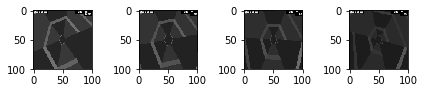

In [5]:
prefix = "1516957247.6614516"

with h5py.File(file_path, "r") as f:
    game_buffer_frames = [skimage.io.imread(io.BytesIO(b)) for b in f[f"{prefix}-frames"].value]
    
skimage.io.imshow_collection(game_buffer_frames)

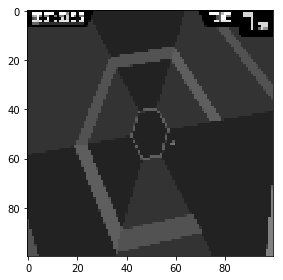

In [6]:
skimage.io.imshow(game_buffer_frames[1])

### Inspecting Inputs

In [7]:
with h5py.File(file_path, "r") as f:
    for key in f.keys():
        if key.endswith("-inputs"):
            inputs = f[key].value
            
            if len(inputs):
                print(inputs)

[[b'KEY_RETURN' b'0.0720682144165039']]
[[b'KEY_LEFT' b'0.2717607021331787']]
[[b'KEY_LEFT' b'0.13613080978393555']]
[[b'KEY_LEFT' b'0.08007645606994629']]
[[b'KEY_LEFT' b'0.14413857460021973']]
[[b'KEY_LEFT' b'0.15865159034729004']]
[[b'KEY_RIGHT' b'0.15164542198181152']]
[[b'KEY_LEFT' b'0.3838675022125244']]
[[b'KEY_RIGHT' b'0.40789175033569336']]
[[b'KEY_RIGHT' b'0.13613033294677734']]
[[b'KEY_RIGHT' b'0.10359954833984375']]
[[b'KEY_RIGHT' b'0.4719524383544922']]
[[b'KEY_LEFT' b'0.42340660095214844']]
[[b'KEY_RIGHT' b'0.29628443717956543']]
[[b'KEY_RIGHT' b'0.3763608932495117']]
[[b'KEY_LEFT' b'0.16816139221191406']]
[[b'KEY_LEFT' b'0.3523380756378174']]
[[b'KEY_LEFT' b'0.41589975357055664']]
[[b'KEY_LEFT' b'0.4399223327636719']]
[[b'KEY_RIGHT' b'0.48796796798706055']]
[[b'KEY_LEFT' b'0.3198065757751465']]
[[b'KEY_LEFT' b'0.26375341415405273']]
[[b'KEY_LEFT' b'0.29578447341918945']]
[[b'KEY_RIGHT' b'0.20819950103759766']]
[[b'KEY_RIGHT' b'0.7417111396789551']]
[[b'KEY_RIGHT' b'0.175

### Inspecting Active Inputs

In [8]:
with h5py.File(file_path, "r") as f:
    for key in f.keys():
        if key.endswith("-inputs-active"):
            print(f[key].value)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_RETURN']
[]
[]
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[b'KEY_LEFT']
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[]
[]
[]
[b'KEY_LEFT']
[b'KEY_LEFT']
[b'KEY_LEFT']
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[b'KEY_LEFT']
[b'KEY_LEFT']
[b'KEY_LEFT']
[b'KEY_LEFT']
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[]
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[b'KEY_RIGHT']
[]
[]
[]
[]
[b'KEY_LEFT']
[]
[]
[]
[]
[]
[]
[]
[]
[b'KEY_LEF